## Gaussian Transformation

Models in ml such as linear and logistic regression assume that variables are normal distribution.

If variables are not normally distributed ,sometimes it is possible to find a mathematical transformation so taht the transformed variable is Gaussian.

### Techniques for Feature transformation 

1.Logrithmic transformatin\
2.Reciprocal transformation\
3.Square root transformation\
4.Exponential transformation\
5.Boxcox transformation.

***NOTE:-If we have a problem statement of linear or logistic regression and if data is gaussian distributed then model performance is good . The reason why is***

## Linear Regression Assumptions

Linear regressoin has following assumptions over the predictor variables X.

1. ***Linear Relationship***:- Linear regression needs the relationship between dependent and independent variables to be linear.This can be tested with scatter plot.Linearity assumption is not valid for polynomial regression.\

2.***Multivarate Normality***:- Each and every feature needs to follow gaussian distribution. This assumption can be checked with hostogram or Q-Q plot.


3.***Multicolinearity***:-Regressoin asumes that there is less or no multicolinearity in the data. Multicollinearity occus when independent variables are too highly corelated . can Be checked using corelatin matrix.


### Do Variable Distribution affect any other machine learning models?

The remaining models, including Neural Networks, SVM,Tree based models ,PCA do not make any assumptions over distribution of independent variables . 

**NOTE:-we do not make gaussian transformation for above models , only for linear and logistic regression.**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [7]:
data=pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv",usecols=['Age','Fare','Survived'])

In [8]:
data

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [9]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [14]:
def impute_na(data,variable):
    df=data.copy()
    
    #random sampling
    df[variable+'_random']=df[variable]
    
    #extract the random samples to fill na 
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    
    random_sample.index=df[df[variable].isnull()].index
    
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
    
    return df[variable+'_random']

In [15]:
data['Age']=impute_na(data,'Age')

In [16]:
data.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

## Q-Q plot 

In [26]:
def diagnostic_plots(df,variable):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[variable].hist()
    # Q-Q plot
    plt.subplot(1,2,2)
    sts.probplot(df[variable],dist='norm',plot=plt)
    
    plt.show()

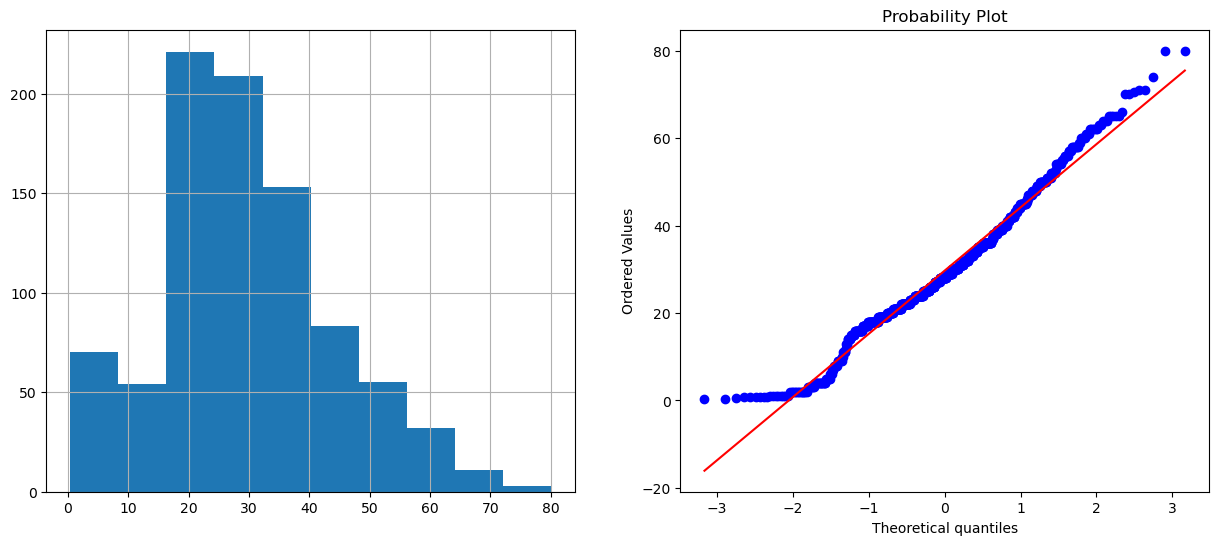

In [27]:
diagnostic_plots(data,'Age')

### Observation 

The age feature is gaussian distributed as seen in above plot.

The x aixs values in Q-Q plot are linear distribution values (3,-3)

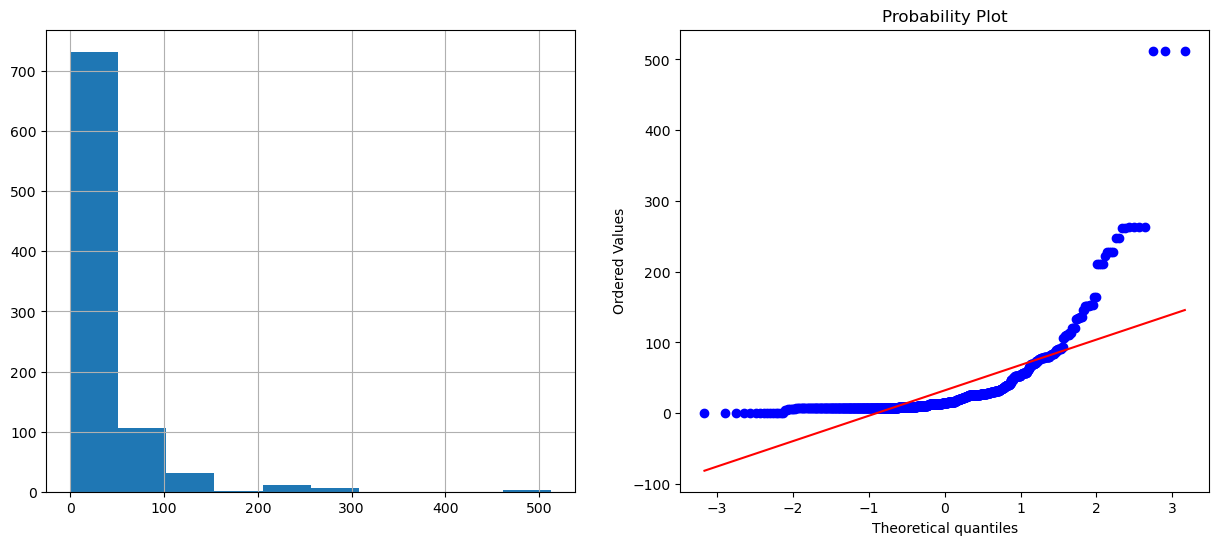

In [28]:
diagnostic_plots(data,'Fare')

### Observation
The feature is postively skewed

##  Logrithmic transformatin

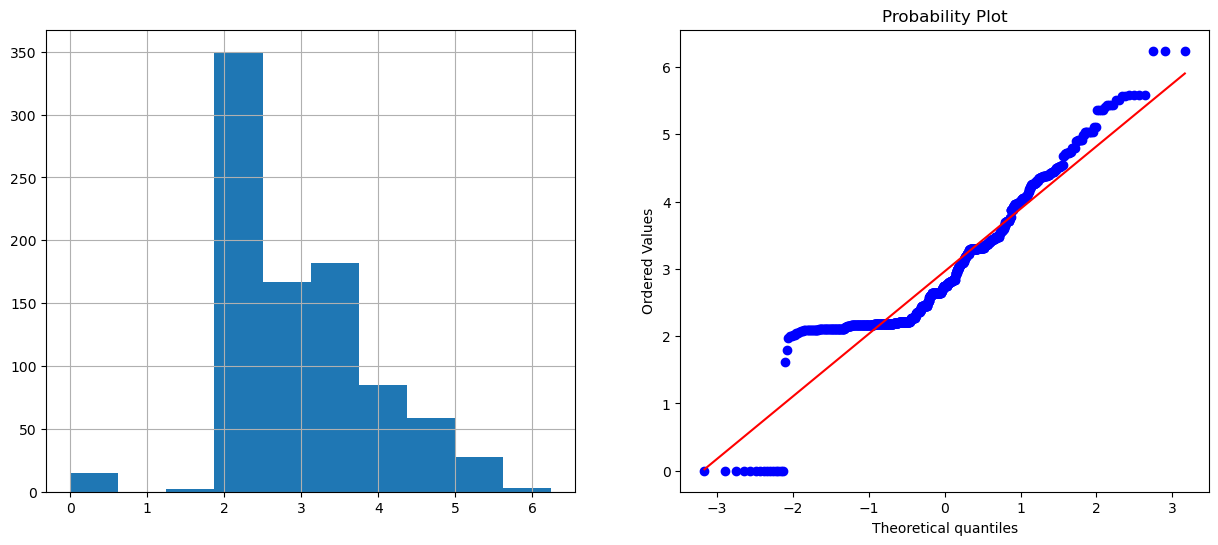

In [29]:
# +1 is added because if there is any 0 in fare vlaue we cannot find log of 0 so we place 1 
data['Log_Fare']=np.log(data['Fare']+1)
diagnostic_plots(data,'Log_Fare')

### Observation

Logrithmic distribution makes Fare feature gaussian distribution 

## 2. Reciprocal Transformation

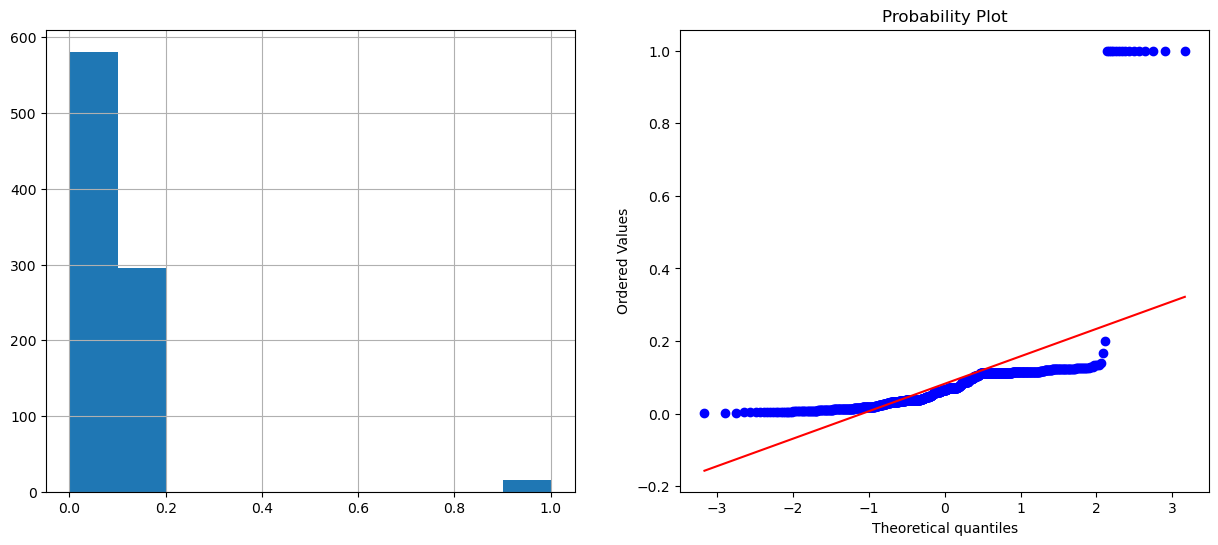

In [30]:
data['Rec_Fare']=1/(data['Fare']+1)
diagnostic_plots(data,'Rec_Fare')

### Observation 

This transformation is not working well on Fare fetaure

## 3. Square root transformation

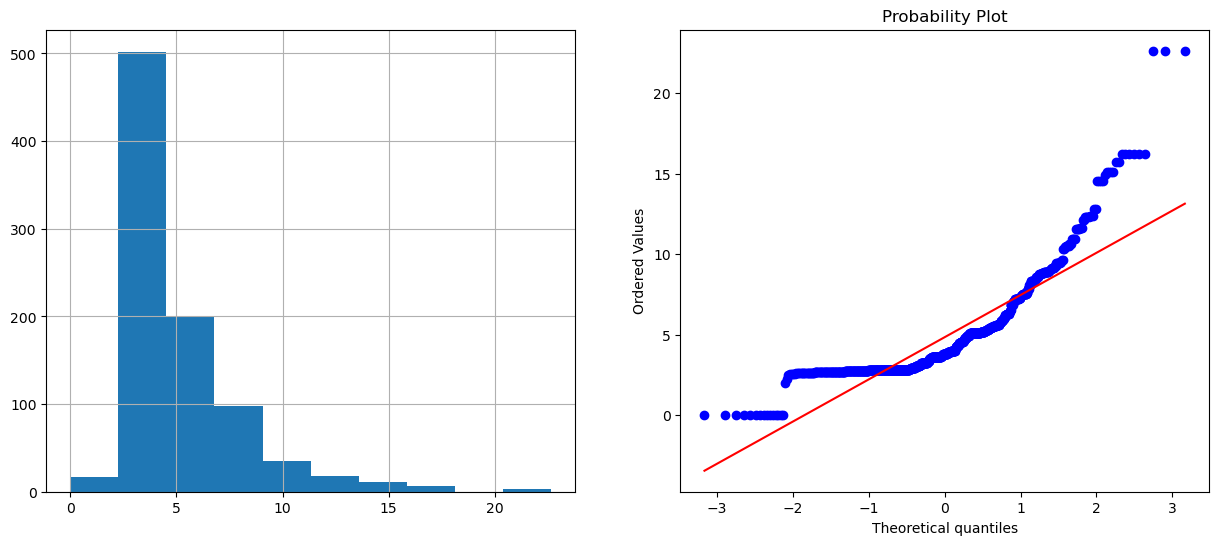

In [33]:
data['Square_Fare']=data['Fare']**(1/2)
diagnostic_plots(data,'Square_Fare')

## 4.Exponential transformation

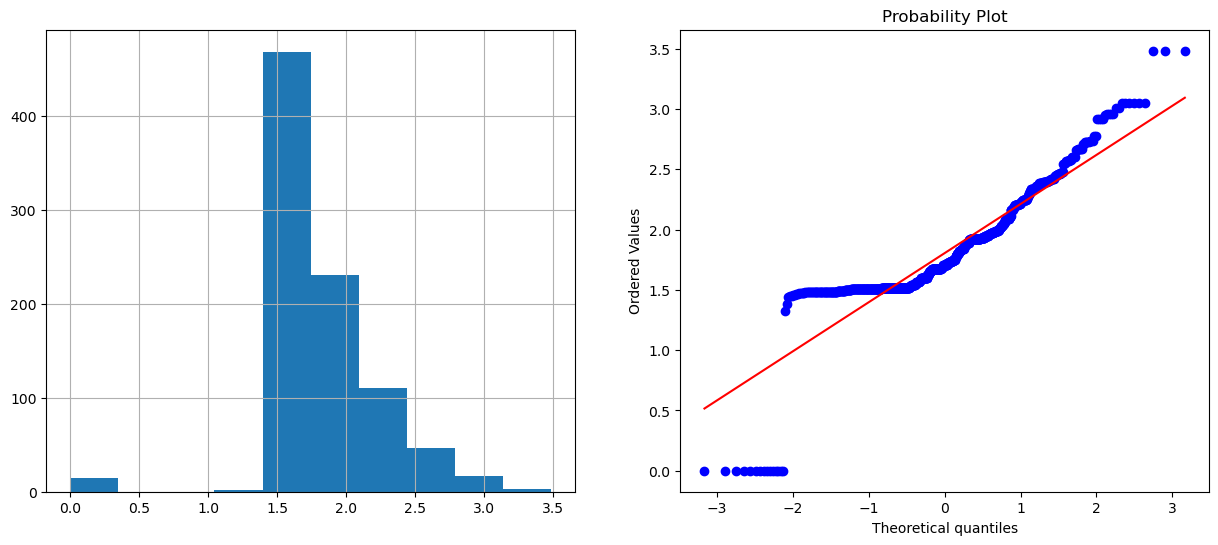

In [34]:
data['Expo_Fare']=data['Fare']**(1/5)
diagnostic_plots(data,'Expo_Fare')

## 5.BoxCox Transformation

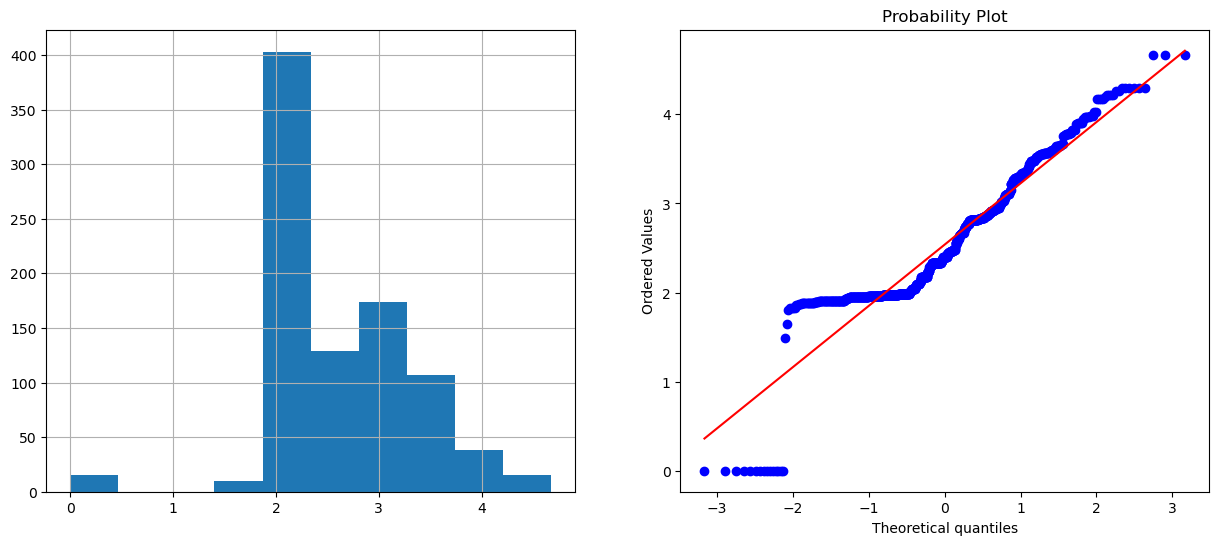

In [36]:
data['Fare_boxcox'],param=sts.boxcox(data.Fare+1)
diagnostic_plots(data,'Fare_boxcox')